In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler


In [38]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/cancer.csv')

In [39]:
df.head()

,Unnamed: 0,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [40]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


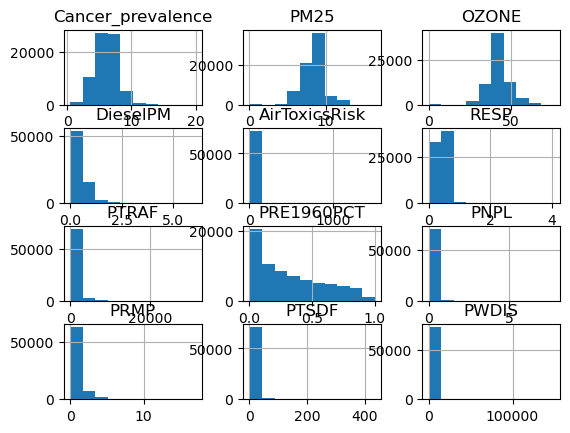

In [41]:
df.hist()
plt.show()

In [42]:
X = df.copy()
X.drop('Cancer_prevalence', axis=1, inplace=True)
y = df['Cancer_prevalence']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

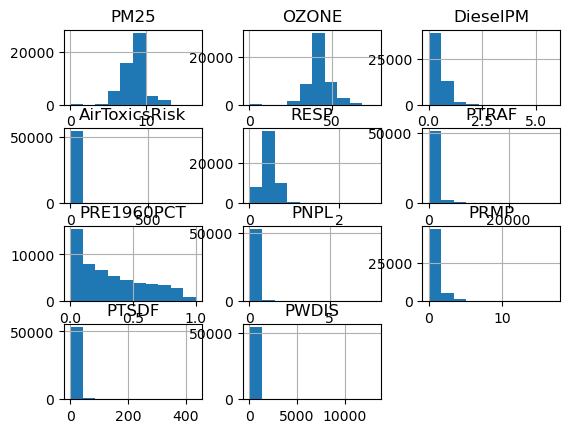

In [44]:
X_train.hist()
plt.show()

In [45]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
61463,9.361305,40.619592,0.457945,31.587571,0.407155,539.908464,0.698910,0.354710,3.652795,2.388800,0.727741
36654,5.681356,34.876161,0.053293,14.493847,0.156513,9.421734,0.177065,0.007767,0.020658,0.020658,0.000018
49124,8.789259,43.206995,0.374814,37.306390,0.468053,214.050811,0.054453,0.045666,0.308079,1.571190,0.000000
25466,7.956112,43.989792,0.233114,30.418250,0.314768,152.878130,0.274825,0.366766,0.408834,1.662194,0.012476
42509,9.225175,44.491121,0.681500,32.810760,0.445552,890.520710,0.764515,0.930171,0.877805,4.765274,0.000284


In [46]:
# Taking the log of the data in X_train that are not close to being normally distributed
pt = PowerTransformer()
pt.fit(X_train[['DieselPM']])
X_train['DieselPM'] = pt.transform(X_train[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train[['AirToxicsRisk']])
X_train['AirToxicsRisk'] = pt1.transform(X_train[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train[['RESP']])
X_train['RESP'] = pt2.transform(X_train[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train[['PTRAF']])
X_train['PTRAF'] = pt3.transform(X_train[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train[['PRE1960PCT']])
X_train['PRE1960PCT'] = pt4.transform(X_train[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train[['PNPL']])
X_train['PNPL'] = pt5.transform(X_train[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train[['PRMP']])
X_train['PRMP'] = pt6.transform(X_train[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

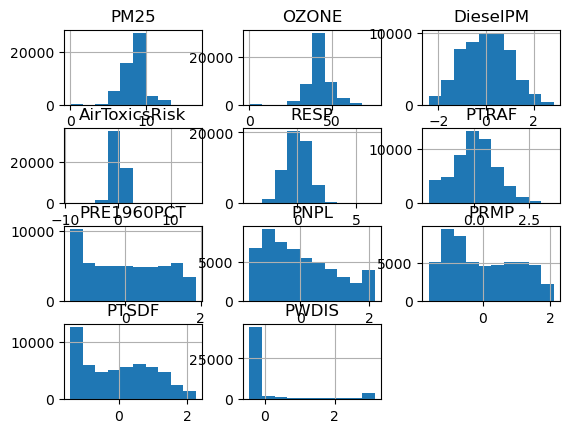

In [47]:
X_train.hist()
plt.show()

Perhaps PWDIS should just be left out of the data. I can decide that when I pick a model to use.

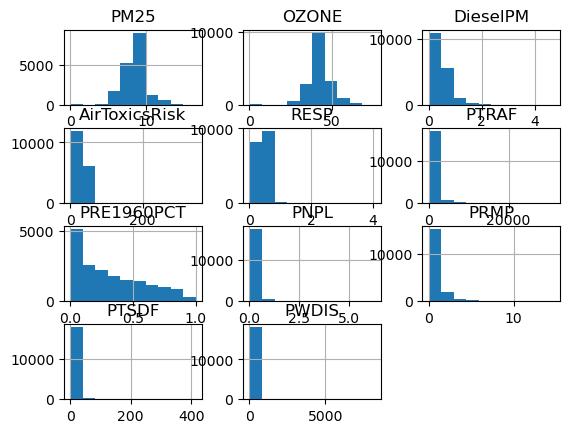

In [18]:
X_test.hist()
plt.show()

In [48]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test['DieselPM'] = pt.transform(X_test[['DieselPM']])

X_test['AirToxicsRisk'] = pt1.transform(X_test[['AirToxicsRisk']])

X_test['RESP'] = pt2.transform(X_test[['RESP']]) 

X_test['PTRAF'] = pt3.transform(X_test[['PTRAF']])

X_test['PRE1960PCT'] = pt4.transform(X_test[['PRE1960PCT']])

X_test['PNPL'] = pt5.transform(X_test[['PNPL']])

X_test['PRMP'] = pt6.transform(X_test[['PRMP']])

X_test['PTSDF'] = pt7.transform(X_test[['PTSDF']])

X_test['PWDIS'] = pt8.transform(X_test[['PWDIS']])

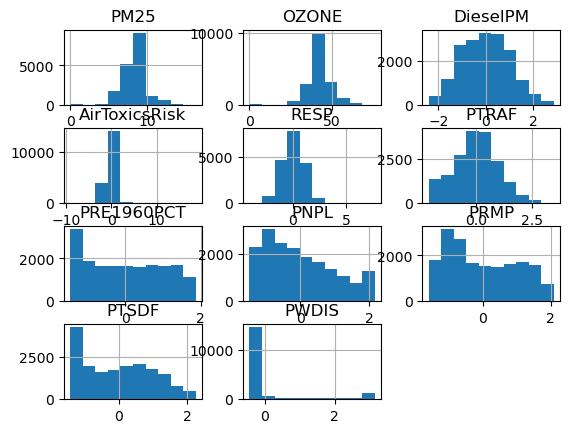

In [49]:
X_test.hist()
plt.show()

Cancer data should now be ready to model

In [50]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer')